In [7]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [8]:
from collections import Counter
from typing import List
import matplotlib.pyplot as plt

import import_ipynb

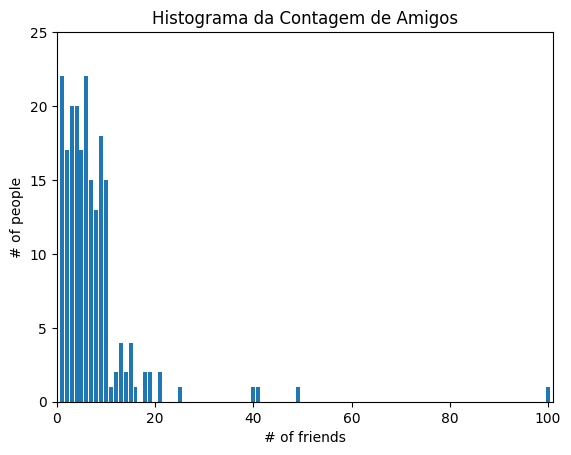

In [9]:
friend_counts = Counter(num_friends)

xs = range(101)
ys = [friend_counts[x] for x in xs]

# plt.bar(xs, ys)
# plt.axis([0, 101, 0, 25])
# plt.title("Histograma da Contagem de Amigos")
# plt.xlabel("# of friends")
# plt.ylabel("# of people")
# plt.show()


In [10]:
num_points = len(num_friends)

204

In [11]:
largest_value = max(num_friends)
smallest_value = min(num_friends)

1

### Tendência Centrais

In [12]:
# média
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

assert mean(num_friends) == 7.333333333333333

In [13]:
# mediana

# os sublinhados indicam que essas funções são privadas, ou seja, elas devem ser chamadas pela função de mediana, mas não por outros usuários
def _median_odd(xs: List[float]) -> float:
    """Se len(xs) for ímpar, a mediana será o elemento do meio"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """Se len(xs) for par, ela será a média dos dois elementos do meio"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2      # e.g. comprimento = 4 => hi_midpoint = 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Encontra o valor do meio em v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

# print(median(num_friends))

6.0


In [14]:
# quantil (valor que separa determinada porcentagem dos dados)

def quantile(xs: List[float], p: float) -> float:
    """Retorna o valor pth-percentile em x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

In [15]:
# moda - os valores mais frequentes no conjunto de dados

def mode(x: List[float]) -> List[float]:
    """Retorna uma lista, pois pode haver mais de uma moda"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

assert set(mode(num_friends)) == {1, 6}
# mode(num_friends)

### Dispersão

In [16]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99

In [17]:
from linear_algebra import sum_of_squares

def de_mean(xs: List[float]) -> List[float]:
    """Traduza xs subtraindo sua média (para que o resultado tenha média 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Quase o desvio quadrado médio da média"""
    assert len(xs) > 2, 'variance requires at least two elements'

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55

In [18]:
import math

# desvio padrão
def standard_deviation(xs: List[float]) -> float:
    """O desvio padrão é a raiz quadrada da variancia"""
    return math.sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

In [19]:

# diferença entre o 75° quartil e o 25° quartil
def interquartile_range(xs: List[float]) -> float:
    """Retorna a diferença entre o percentil 75% e o percentil 25%"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 6

### Correlação

In [20]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

In [21]:
import import_ipynb
import linear_algebra
from typing import List

In [23]:
# covariância - mede a variação simultânea de duas variáveis em relação às suas médias

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have the same number of elements"

    return linear_algebra.dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

In [24]:
# correlação - divide os desvios-padrão das duas variáveis

def correlation(xs: List[float], ys: List[float]) -> float:
    """Mede a correlação simultânea de xs e ys a partir das suas médias"""

    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)

    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0                                            # se não houver variação, a correlação é zero
    
assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

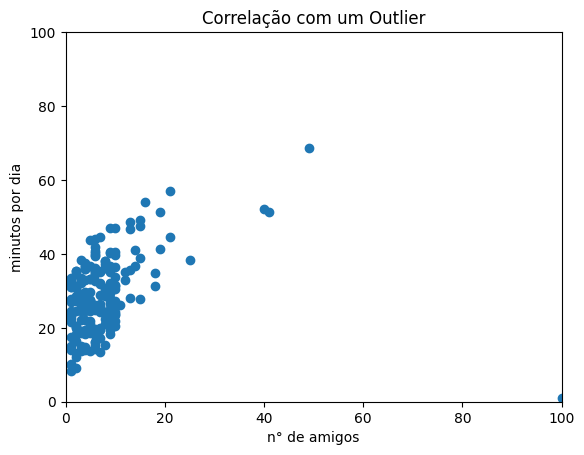

In [28]:
# checando os dados
# existe uma pessoa que tem 100 amigos e passa apenas 1 minuto no site

# import matplotlib.pyplot as plt

# plt.scatter(num_friends, daily_minutes)
# plt.axis([0, 100, 0, 100])
# plt.xlabel('n° de amigos')
# plt.ylabel('minutos por dia')
# plt.title("Correlação com um Outlier")
# plt.show()

In [29]:
import math

# removendo o outlier da nossa correlação
outlier = num_friends.index(100) # index do outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x 
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]


daily_hours_good = [x 
                      for i, x in enumerate(daily_hours)
                      if i != outlier]

assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58

# assim verificamos que a correlação sem o outlier é bem mais forte